# *Predicting Titanic Survivors Using ML*


>### Note:
You may observe that many people in this competition have got **high scores, in some cases even 100%**. They have been either **overfitting** their models or **cheating** since the ground truth labels of the test set are publicly available online. **I tried to improve the accuracy of my model as much as I can without overfitting.**

# **Contents**
1. [Importing All Necessary Packages & Libraries](#p1)
2. [Information About The Titanic Dataset](#p2)
3. [Data Exploration & Filling Missing Values](#p3)
4. [Visualising Correlation between Data Attributes & Target Variable](#p4)
5. [Computing New Features or Feature Engineering](#p5)
6. [Rescaling Features](#p6)
7. [Modelling Data](#p7)
8. [Evaluating Performances of Models](#p8)
9. [Training Full Data on Best Model & Making Output Submission-Ready](#p9)

<a id="p1"></a>
# **1. Importing All Necessary Packages & Libraries**
In order to preprocess, visualise and train data, we need to take help from a bunch of packages and libraries. These things make coding convenient and increases readability. For preprocessing data I will be using Numpy and Pandas. For visualising data I will be using Matplotlib and Seaborn. Finally for training machine learning models, I will be using Scikit-Learn which will be imported in the Modelling section.

In [178]:
import numpy as np 
import pandas as pd 

import missingno
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
print(os.listdir("data/"))

['gender_submission.csv', 'test.csv', 'train.csv']


<a id="p2"></a>
# **2. Information About The Titanic Dataset**
I have downloaded the dataset from Kaggle Website by entering Titanic Competition. You can download the dataset by clicking "Download All" from this [link](https://www.kaggle.com/c/titanic/data).

A broad description of the entire dataset can be found [in the website](https://www.kaggle.com/c/titanic/data). Here, I will provide a brief description of the important parts of the dataset.

So, basically we have to predict which of the passengers successfully survived the "Titanic Ship Wreck" based on the features provided in the dataset. Some important features of the dataset are as follows:

- **Survived: 1 = Survived, 0 = Did NOT Survive** (This is the most important one as we have to predict these labels.)

- **PasengerId: Unique Identifier for each passenger**

- **Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class.** This also shows the socio-economic status of the passengers.

- **Name: Full name of passenger with a title**

- **Sex: Male or Female**

- **Age: Age in years, fractional if less than 1**

- **SibSp: Number of Siblings or Spouses aboard the titanic**

- **Parch: Number of Parents or Children aboard the titanic**

- **Ticket: Passenger Ticket Number**

- **Fare: Passenger Fare**

- **Cabin: Cabin Number**

- **Embarked: Point of Embarkation where C = Cherbourg, Q = Queenstown, S = Southampton**


### Loading & Viewing the Dataset
We can use Pandas to read our training and testing data using `pd.read_csv()`. Then we can use the `.head()` function to observe the first five rows of our data. We can also use `.keys()` to view all the column names of the pandas dataframe.

In [179]:
training = pd.read_csv("data/train.csv")
testing = pd.read_csv("data/test.csv")

In [180]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


From above, we see that the data is not ready yet! We need to preprocess it properly in order to feed it into machine learning models.

In [182]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Using `.info()` we can see the data types of each of our training features.

In [183]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we are observing the numerical features of our dataset using `.dtypes` and logical operation `==`.

In [184]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features:")
print(num_values)

These are the numerical features:
Age     float64
Fare    float64
dtype: object


The rest of the features need to be processed accordingly before feeding into different models.

Using the `.describe()` method we can see the statistical analysis of the numerical features in our dataset including data count, mean, standard deviation, percentiles and max value. 

In [185]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>**Note:** We have to keep in mind that only **'Age'** and **'Fare'** are actual numerical values and the other features are just represented with numbers.

<a id="p3"></a>
# **3. Data Exploration & Filling Missing Values**
Before feeding features to our model, it is very important that we address the missing values of our features. In order to train our models accurately, we need to fill those missing values with substitute values so that our models have a complete prediction for each row in the dataset. This process is known as **imputation.**

Using `missingno.matrix()` of "missingno" package we can wonderfully visualise the missing values for each column of both training and testing data. 

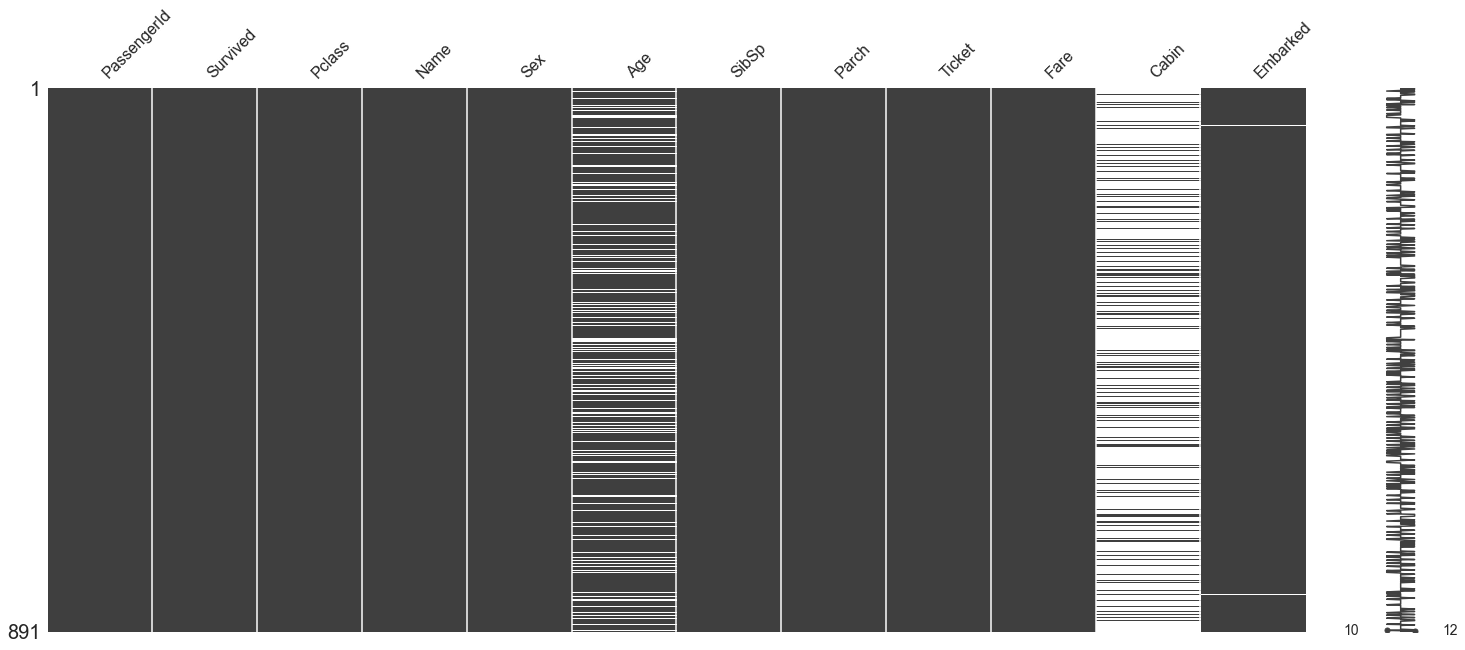

In [186]:
missingno.matrix(training);

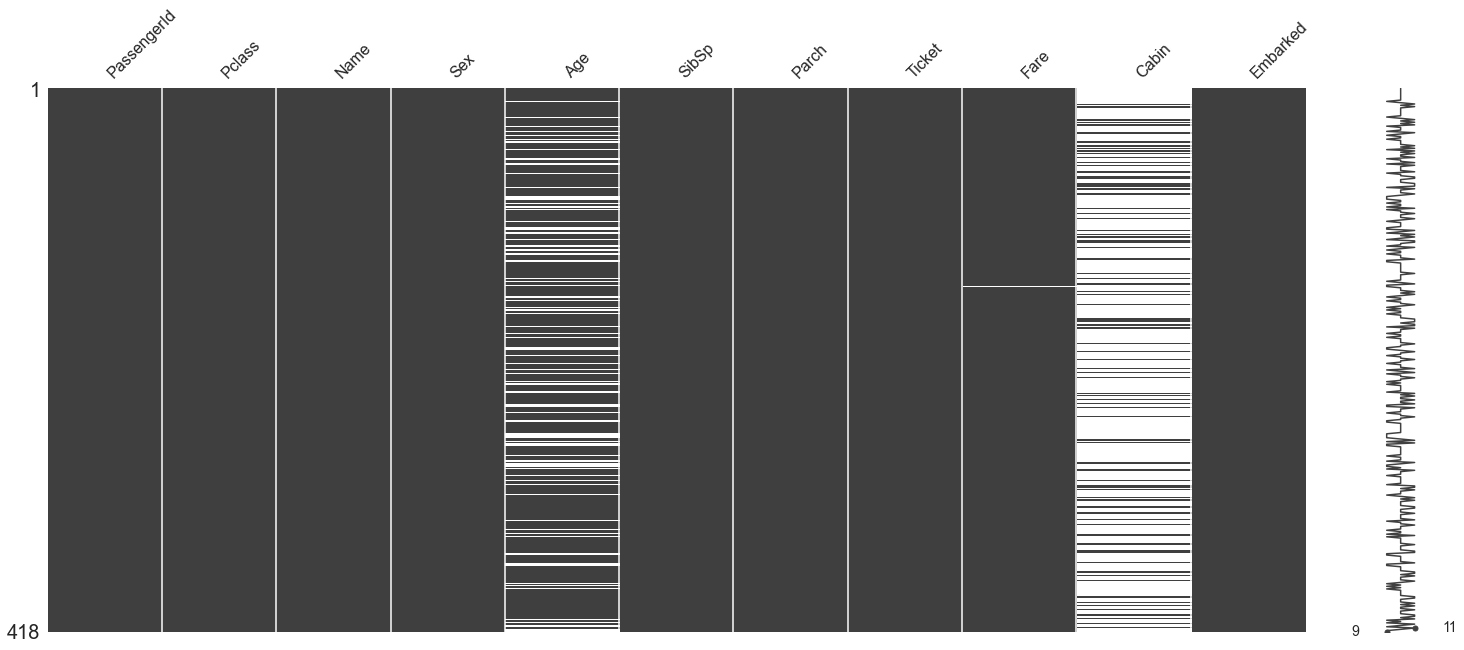

In [187]:
missingno.matrix(testing);

`isna().sum()` is used to get the sum of all the missing values for each column and then `pd.concat()` is used to display them together in a dataframe.

In [188]:
def null_table(training, testing):
    train_na = training.isna().sum()
    test_na = testing.isna().sum()
    df = pd.concat([train_na, test_na], axis=1, sort = False, keys = ['Train Null Values', 'Test Null Values'])
    print(df)

null_table(training, testing)

             Train Null Values  Test Null Values
PassengerId                  0               0.0
Survived                     0               NaN
Pclass                       0               0.0
Name                         0               0.0
Sex                          0               0.0
Age                        177              86.0
SibSp                        0               0.0
Parch                        0               0.0
Ticket                       0               0.0
Fare                         0               1.0
Cabin                      687             327.0
Embarked                     2               0.0


We can see that "Cabin" and "Age" columns have missing values both in training and test set. I have decided to **drop "Cabin" column** since it has a lot of missing values. I have also decided to **drop "Ticket" column** since it seems to me that it has quite a bit of noise and wouldn't impact the performance of our model.

In [189]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

             Train Null Values  Test Null Values
PassengerId                  0               0.0
Survived                     0               NaN
Pclass                       0               0.0
Name                         0               0.0
Sex                          0               0.0
Age                        177              86.0
SibSp                        0               0.0
Parch                        0               0.0
Fare                         0               1.0
Embarked                     2               0.0


Now, we take a look at the distribution of the **"Age" column** to check whether it is skewed or symmetrical. This will help us determine what value to replace the NaN values.

Here using `.copy()` I have created a copy of our dataframe and using `.dropna()` I have dropped all missing values in order to visualise the distribution of the "Age" column using `sns.distplot()`.

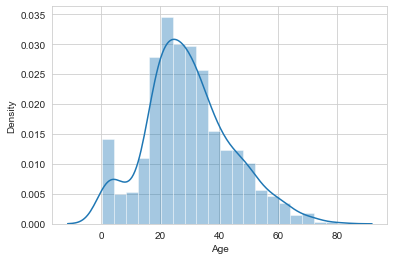

In [190]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"]);

So we see that the distribution of 'Age' column is slightly skewed right. Because of this, we can fill in the null values with the median for the most accuracy. 

> **Note:** As our distribution of "Age" column is **skewed**, we have very large values in one end. This will greatly affect the mean compared to the median. So we should use median instead of mean.

Using `.fillna()` we are replacing the NaN values of "Age" column with the median age.

In [191]:
#Nan cells are replaced by median
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

             Train Null Values  Test Null Values
PassengerId                  0               0.0
Survived                     0               NaN
Pclass                       0               0.0
Name                         0               0.0
Sex                          0               0.0
Age                          0               0.0
SibSp                        0               0.0
Parch                        0               0.0
Fare                         0               0.0
Embarked                     0               0.0


We have no more missing values. Now let us look at our imputed data.

In [192]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [193]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


<a id="p4"></a>
# **4. Visualising Correlation between Data Attributes & Target Variable**
Before training it is very important to understand the correlation of different data attributes with the labels of the target variable. In our case, the labels are the values in the "Survived" column. Essentially, we would like to see the trends and general association of features like Sex, Age and Class with the Survival Rate. We can do this by plotting various graphs for each feature.

## Gender

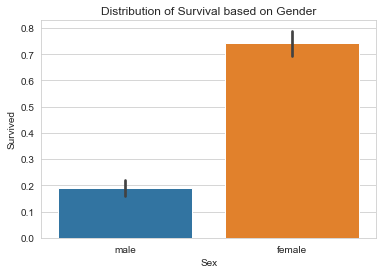

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [194]:
# Creates a barplot with Sex in X axis and Survived in Y axis
sns.barplot(x="Sex", y="Survived", data=training)
# Title of the plot
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

> **Note:** The numbers printed above are the proportion of male/female survivors of all the surviviors ONLY. The graph shows the propotion of male/females out of ALL the passengers including those that didn't survive.

Gender is a very good feature to use to predict survival, as shown by the large difference in propotion survived. Let's take a look at how class plays a role in survival as well.

## Class

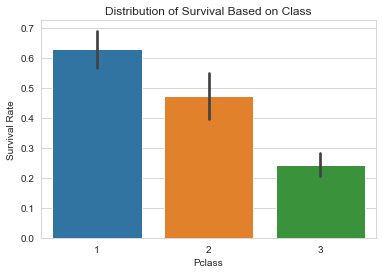

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [195]:
# Creates a barplot with Pclass in Xaxis and Survived in Y axis.
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

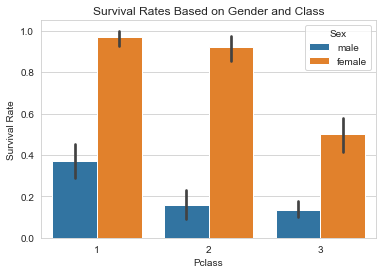

In [196]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Observing the above plot we can see that, for all types of Passsenger Class, survival rate of females is more than the males.

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

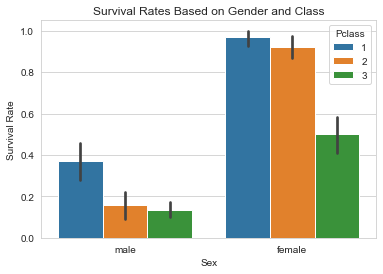

In [197]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

The above graph shows that Pclass (Passenger Class) also plays a role in determining survival. It seems that people in Pclass1 are more likely to survive than the other two Pclasses.

## Age

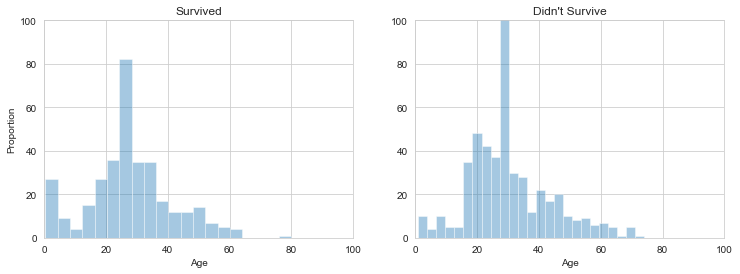

In [198]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

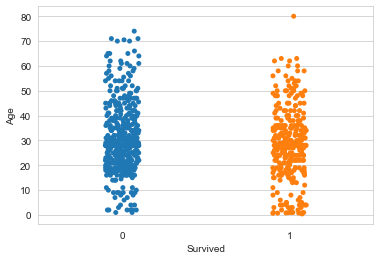

In [199]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True);

From the above survival distribution histogram and clustered stripplot of Age Vs Survived it becomes clear that, younger people are more likely to survive than older people.

## Relation among all of the different features using pairplot

Below is one final cumulative graph of a pair plot that shows the relations between all of the different features

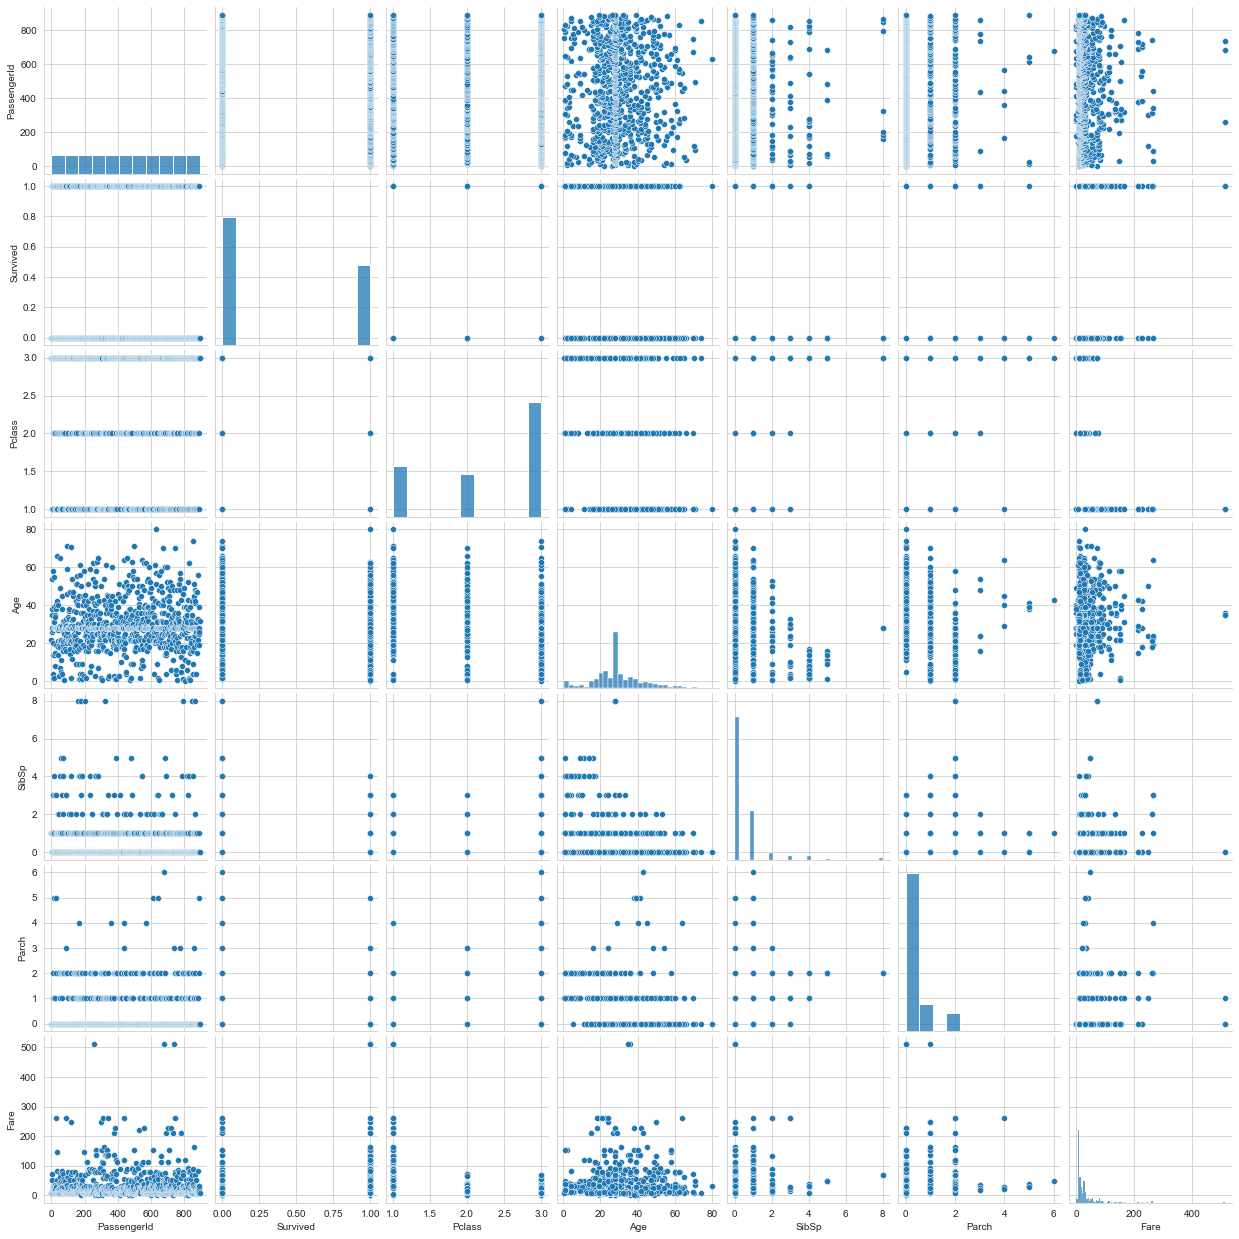

In [200]:
sns.pairplot(training);

<a id="p5"></a>
# **5. Computing New Features or Feature Engineering**
Because values in the Sex and Embarked columns are categorical values, we have to represent these strings as numerical values in order to perform our classification with our model. We can also do this process through **One-Hot-Encoding**.

In [201]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,83.4750,S
301,302,1,3,"McCoy, Mr. Bernard",male,28.0,2,0,23.2500,Q
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,135.6333,C
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,8.8500,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0000,S


In [202]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
107,999,3,"Ryan, Mr. Edward",male,27.0,0,0,7.7500,Q
348,1240,2,"Giles, Mr. Ralph",male,24.0,0,0,13.5000,S
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,10.5000,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,31.3875,S
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,20.2125,S


We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked. We do this same process on both the training and testing set to prepare our data for Machine Learning.

In [203]:
set(training["Embarked"])

{'C', 'Q', 'S'}

There are 3 values for Embarked: *S*, *C*, and *Q*. We will represent these with numbers as well.

In [204]:
from sklearn.preprocessing import LabelEncoder

# Initialising label encoder to convert categorical variable Sex to numerical value
le_sex = LabelEncoder()
# Fitting the Sex column to identify the categories
le_sex.fit(training["Sex"])

# Transform the categorical values of Sex column into numerical values for both train and test set and also overwrite the 
# columns in the training and testing dataframe.
encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

# Initialising label encoder to convert categorical variable Embark to numerical value
le_embarked = LabelEncoder()
# Fitting the Embark column to identify the categories
le_embarked.fit(training["Embarked"])

# Transform the categorical values of Embark column into numerical values for both train and test set and also overwrite 
# the columns in the training and testing dataframe.
encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

In [205]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",0,5.0,0,0,12.4750,2
135,136,0,2,"Richard, Mr. Emile",1,23.0,0,0,15.0458,0
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",0,45.0,0,0,7.7500,2
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",0,28.0,1,0,15.5000,1
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",0,50.0,0,1,26.0000,2


In [206]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
192,1084,3,"van Billiard, Master. Walter John",1,11.5,1,1,14.5000,2
117,1009,3,"Sandstrom, Miss. Beatrice Irene",0,1.0,1,1,16.7000,2
242,1134,1,"Spedden, Mr. Frederic Oakley",1,45.0,1,1,134.5000,0
60,952,3,"Dika, Mr. Mirko",1,17.0,0,0,7.8958,2
304,1196,3,"McCarthy, Miss. Catherine Katie""""",0,27.0,0,0,7.7500,1


## *Creating Synthetic Features*
Sometimes it is useful to create synthetic feature which is a ratio of two other features and might help in predicting the target value. 

We can **combine SibSp and Parch** into one synthetic feature called **Family Size**, which indicates the total number of family members on board for each member. 

In [207]:
# The plus 1 is added to create a new feature called IsAlone to determine if passengers were alone or not on the ship
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

This **IsAlone** feature also may work well with the data we're working with, telling us if the passenger was alone or not on the ship.

In [208]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

We can also extract some useful information from the name column. Not the actual names themselves, but the title of their names like Ms. or Mr. This may also provide a hint as to whether the passenger survived or not. Therefore we can extract this title and then encode it like we did for Sex and Embarked.

In [209]:
# I haveused regex expressions to extract the titles from the names and create a new synthetic feature
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [210]:
# Title column added
training.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [211]:
# Making it a set gets rid of all duplicates
titles = set(training["Title"]) 
print(titles)

{'Don', 'Col', 'Mrs', 'Mr', 'Lady', 'Sir', 'Capt', 'Rev', 'Miss', 'Mlle', 'Jonkheer', 'Master', 'Mme', 'Countess', 'Ms', 'Dr', 'Major'}


In [212]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[1, 2, 125, 517, 1, 1, 1, 6, 182, 2, 1, 40, 1, 1, 1, 7, 2]


The frequency of the different types of titles is as follows:

In [213]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0        Don          1
1        Col          2
2        Mrs        125
3         Mr        517
4       Lady          1
5        Sir          1
6       Capt          1
7        Rev          6
8       Miss        182
9       Mlle          2
10  Jonkheer          1
11    Master         40
12       Mme          1
13  Countess          1
14        Ms          1
15        Dr          7
16     Major          2


From above we can see that, there are many titles like Major, Mlle, Col, Capt etc that have a frequency of 1 or 2. Instead of being as separate classes they can be converted into one single class **"Others"** which is done below and then these categorical values are converted to numerical values.

In [214]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

# Initialising label encoder to convert categorical variable Title to numerical value
le_title = LabelEncoder()
# Fitting the Title column to identify the categories
le_title.fit(training["Title"])

# Transform the categorical values of Title column into numerical values for both train and test set and also overwrite the 
# columns in the training and testing dataframe.
encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

Since we have created a new feature called **"Title"** using the **"Name"** column, we no longer need the **"Name"** column and can **drop** it. 

In [215]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [216]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
429,430,1,3,1,32.0,0,0,8.0500,2,1,1,3
405,406,0,2,1,34.0,1,0,21.0000,2,2,0,3
395,396,0,3,1,22.0,0,0,7.7958,2,1,1,3
575,576,0,3,1,19.0,0,0,14.5000,2,1,1,3
134,135,0,2,1,25.0,0,0,13.0000,2,1,1,3


In [217]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
373,1265,2,1,44.0,0,0,13.000,2,1,1,3
189,1081,2,1,40.0,0,0,13.000,2,1,1,3
397,1289,1,0,48.0,1,1,79.200,0,3,0,4
253,1145,3,1,24.0,0,0,9.325,2,1,1,3
69,961,1,0,60.0,1,4,263.000,2,6,0,4


So all the features are in numerical form now. It is ready to be fed into our model. Before we do that however, there's something else that we should notice when looking at the preprocessed data. Particularly, the Age and Fare feature values.

<a id="p6"></a>
# **6. Rescaling Features**
If we take a look at the Age and Fare features above, we can see that the values deviate heavily from the other features. This may cause some problems when we are modelling, since it may make these features seem more important than others. It would be beneficial to scale them so they are more representative. We can do this with both a MinMaxScaler or a StandardScaler. I will do this with a StandardScaler. The steps are shown below.

In [218]:
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler for Age and Fare column
scaler = StandardScaler()

# Reshape the data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

# Fit and Transform the Age and Fare columns for both the training and test set
training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [219]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [220]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,1,0.386231,0,0,-0.497413,1,1,1,3
1,893,3,0,1.371370,1,0,-0.512278,2,2,0,4
2,894,2,1,2.553537,0,0,-0.464100,1,1,1,3
3,895,3,1,-0.204852,0,0,-0.482475,2,1,1,3
4,896,3,0,-0.598908,1,1,-0.417492,2,3,0,4


This feature scaling may allow for higher accuracy for our models because of the reduced weight of their magnitudes.

<a id="p7"></a>
# **7. Modelling Data**
Now that our data has been processed and formmated properly, and that we understand the realtion between various features of our dataset,  it is time to start building our model. We can import different classifiers from sklearn. **I will try 8 different types of models to see which one gives the best accuracy for its predictions.**

**sklearn Models to Test**

In [221]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To evaluate our model performance, we can use the make_scorer and accuracy_score function from sklearn metrics.

In [222]:
from sklearn.metrics import make_scorer, accuracy_score 

We can use both GridSearch or RandomizedSearch to find the optimal parameters. **I have used GridSearch** as I tried exploring relatively few combinations because the dataset is small. But when the hyperparameter space is large, it is preferrable to use RandomizedSearch which evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

In [223]:
from sklearn.model_selection import GridSearchCV

**Defining Features in Training/Test Set**

In [224]:
# Define training features set
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1)
# Define training label set
y_train = training["Survived"] 
# Define testing features set
X_test = testing.drop("PassengerId", axis=1) 
# We don't have y_test, that is what we're trying to predict with our model and submit it to Kaggle for the score

In [225]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


**Validation Data Set**

Although we already have a test set, it is generally easy to overfit the data with these classifiers. It is therefore useful to have a third data set called the validation data set to ensure that our model doesn't overfit with the data. **We can make this validation data set with sklearn's train_test_split function.** We can also use the validation data set to test the general accuracy of our model.

In [226]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

**SVC Model**

In [227]:
svc_normal = SVC() 
svc_normal = svc_normal.fit(X_training, y_training)

pred_svc_normal = svc_normal.predict(X_valid)
acc_svc_normal = accuracy_score(y_valid, pred_svc_normal)

svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_
svc_clf.fit(X_training, y_training)

pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [228]:
print("The Score for normal SVC is: " + str(acc_svc_normal))
print("The Score for SVC with GrideSearch is: " + str(acc_svc))

The Score for normal SVC is: 0.8212290502793296
The Score for SVC with GrideSearch is: 0.8212290502793296


**LinearSVC Model**

In [229]:
linsvc_normal = LinearSVC() 
linsvc_normal = linsvc_normal.fit(X_training, y_training)

pred_linsvc_normal = linsvc_normal.predict(X_valid)
acc_linsvc_normal = accuracy_score(y_valid, pred_linsvc_normal)

linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for normal LinearSVC is: " + str(acc_linsvc_normal))
print("The Score for LinearSVC with GridSearch is: " + str(acc_linsvc))

The Score for normal LinearSVC is: 0.7932960893854749
The Score for LinearSVC with GridSearch is: 0.7932960893854749


**RandomForest Model**

In [230]:
rf_normal = RandomForestClassifier()
rf_normal = rf_normal.fit(X_training, y_training)

pred_rf_normal = rf_normal.predict(X_valid)
acc_rf_normal = accuracy_score(y_valid, pred_rf_normal)

rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
                 "criterion": ["gini", "entropy"], 
                 "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], 
                 "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for normal Random Forest is: " + str(acc_rf_normal))
print("The Score for Random Forest with GridSearch is: " + str(acc_rf))

The Score for normal Random Forest is: 0.8324022346368715
The Score for Random Forest with GridSearch is: 0.8379888268156425


**LogisiticRegression Model**

In [231]:
logreg_normal = LogisticRegression()
logreg_normal = logreg_normal.fit(X_training, y_training)

pred_logreg_normal = logreg_normal.predict(X_valid)
acc_logreg_normal = accuracy_score(y_valid, pred_logreg_normal)

logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for normal Logistic Regression is: " + str(acc_logreg_normal))
print("The Score for Logistic Regression with GridSearch is: " + str(acc_logreg))

The Score for normal Logistic Regression is: 0.8100558659217877
The Score for Logistic Regression with GridSearch is: 0.7988826815642458


**KNeighbors Model**

In [232]:
knn_normal = KNeighborsClassifier() 
knn_normal = knn_normal.fit(X_training, y_training)

pred_knn_normal = knn_normal.predict(X_valid)
acc_knn_normal = accuracy_score(y_valid, pred_knn_normal)

knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for normal KNeighbors is: " + str(acc_knn_normal))
print("The Score for KNeighbors with GridSearch is: " + str(acc_knn))

The Score for normal KNeighbors is: 0.8156424581005587
The Score for KNeighbors with GridSearch is: 0.7653631284916201


**GaussianNB Model**

In [233]:
gnb_normal = GaussianNB() 
gnb_normal = gnb_normal.fit(X_training, y_training)

pred_gnb_normal = gnb_normal.predict(X_valid)
acc_gnb_normal = accuracy_score(y_valid, pred_gnb_normal)

gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for normal Gaussian NB is: " + str(acc_gnb_normal))
print("The Score for Gaussian NB with GridSearch is: " + str(acc_gnb))

The Score for normal Gaussian NB is: 0.776536312849162
The Score for Gaussian NB with GridSearch is: 0.776536312849162


**DecisionTree Model**

In [234]:
dt_normal = DecisionTreeClassifier() 
dt_normal = dt_normal.fit(X_training, y_training)

pred_dt_normal = dt_normal.predict(X_valid)
acc_dt_normal = accuracy_score(y_valid, pred_dt_normal)

dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for normal Decision Tree is: " + str(acc_dt_normal))
print("The Score for Decision Tree with GridSearch is: " + str(acc_dt))

The Score for normal Decision Tree is: 0.770949720670391
The Score for Decision Tree with GridSearch is: 0.776536312849162


**XGBoost Model**

In [235]:
from xgboost import XGBClassifier

xg_normal = XGBClassifier() 
xg_normal = xg_normal.fit(X_training, y_training)

pred_xg_normal = xg_normal.predict(X_valid)
acc_xg_normal = accuracy_score(y_valid, pred_xg_normal)

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:squarederror"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for normal XGBoost is: " + str(acc_xg_normal))
print("The Score for XGBoost with GridSearch is: " + str(acc_xg))

[23:44:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Score for normal XGBoost is: 0.8379888268156425
The Score for XGBoost with GridSearch is: 0.8435754189944135


<a id="p8"></a>
# **8. Evaluating Performances of Models**
After making so many models and predictions, we should evaluate and see which model performed the best and which model to use on our testing set. So, the models that performed better in GridSearch, it will be considered with GridSearch, and the models that performed better normally without GridSearch, it will be considered without GridSearch. 

In [236]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc_normal, acc_rf, 
              acc_logreg_normal, acc_knn_normal, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
7,XGBClassifier,0.843575
2,Random Forest,0.837989
0,SVC,0.821229
4,K Nearest Neighbors,0.815642
3,Logistic Regression,0.810056
1,Linear SVC,0.793296
5,Gaussian Naive Bayes,0.776536
6,Decision Tree,0.776536


So we see that the **top three models** perform quite well and their accuracy is close. Since the datset is small, I have decided to train the top 3 models on the entire training set and then send it for submission on Kaggle to get the score.

<a id="p9"></a>
# **9. Training Full Data on Best Model & Making Output Submission-Ready**

In [237]:
svc_clf.fit(X_train, y_train)
xg_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

[LibSVM]

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10)

In [238]:
submission_predictions_svc = svc_clf.predict(X_test)
submission_predictions_xg = xg_clf.predict(X_test)
submission_predictions_rf = rf_clf.predict(X_test)

Let's create three dataframes to submit to the competition with our predictions of our top three models.

In [239]:
submission1 = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions_svc
    })

submission1.to_csv("titanic_svc.csv", index=False)
print(submission1.shape)

submission2 = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions_xg
    })

submission2.to_csv("titanic_xg.csv", index=False)
print(submission2.shape)

submission3 = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions_rf
    })

submission3.to_csv("titanic_rf.csv", index=False)
print(submission3.shape)

(418, 2)
(418, 2)
(418, 2)


After submitting my top three models on Kaggle, I get the highest score with SVC(Support Vector Classification) which is an accuracy of **78.47%**